In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Cleaning and Analyzing Airbnb Dataset

In [3]:
# importing the dataset

air =pd.read_csv("C:/Users/soham/OneDrive/Documents/Unmessenger/Assignments/Uncompleted/1207 Assessment 3/1207 Assessment 3/Airbnb_Dataset.csv")
air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [4]:
air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,242.000000,249.000000,249.000000
mean,31376.771084,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,1.091653,1.738956,198.538153
std,18101.018309,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,1.000168,1.234635,126.048056
min,2539.000000,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,15711.000000,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,0.280000,1.000000,75.000000
50%,28321.000000,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,0.795000,1.000000,225.000000
75%,46911.000000,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,62430.000000,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


In [30]:
# Checking column names and null values
air.columns 
air.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
# Since 7 missing values represent approximately 3%% of the dataset, filling them with 0 makes sense, 
# especially if those listings had no reviews.This will maintain consistency without dropping rows:

air['reviews_per_month'].fillna(0,inplace=True)
air['last_review'].fillna('No Reviews',inplace=True)
air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No Reviews,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


# Analyzing the dataset with different visualization techniques

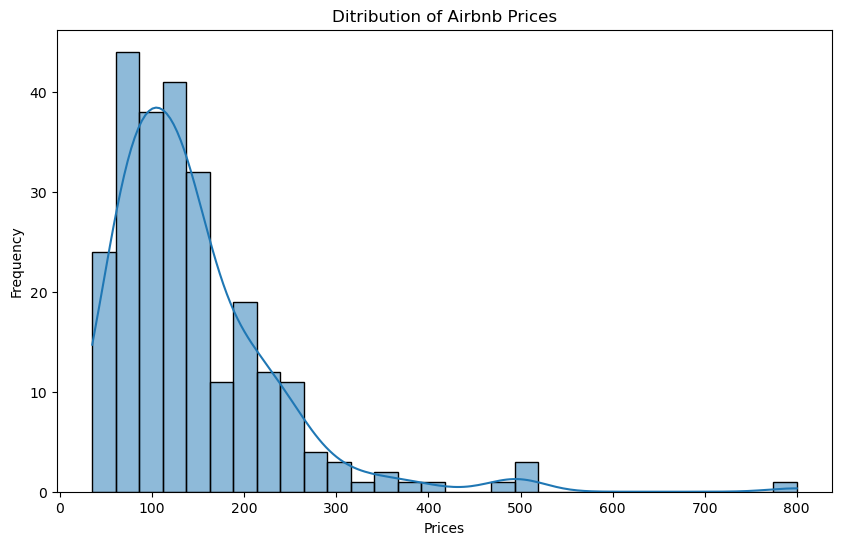

In [28]:
#1.


plt.figure(figsize=(10,6))
sns.histplot(air['price'],bins=30,kde=True)
plt.title('Ditribution of Airbnb Prices')
plt.xlabel('Prices')
plt.ylabel("Frequency")
plt.show()


# 1.Histogram (Airbnb): Price Distribution
### Columns: price
### DataFrame: airbnb
### Chart Type: Histogram
Purpose: The histogram displays the distribution of listing prices in the Airbnb dataset.
It helps in understanding the spread of prices and identifying if there are any price ranges that are particularly common or 
any that are outliers (extremely high or low prices).

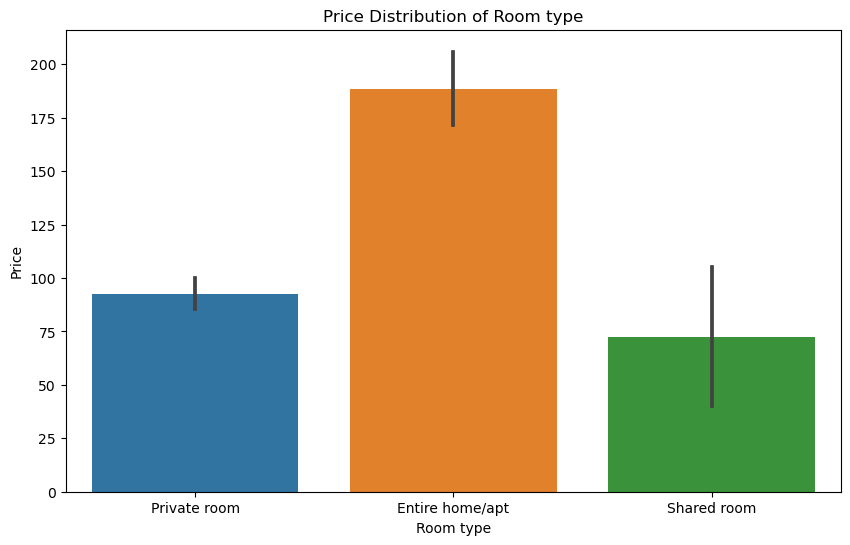

In [13]:
#2.
plt.figure(figsize=(10,6))
sns.barplot(x='room_type',y='price',data=air)
plt.title('Price Distribution of Room type')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.show()

# 2. Box Plot (Airbnb): Price by Room Type
### Columns: room_type, price
### DataFrame: airbnb
### Chart Type: Box Plot
Purpose: The box plot visualizes the distribution of prices for different room types. It helps in understanding the variation in prices within each room type (e.g., entire home, private room) and spotting outliers. This is particularly useful for identifying which room types tend to have higher or lower prices.

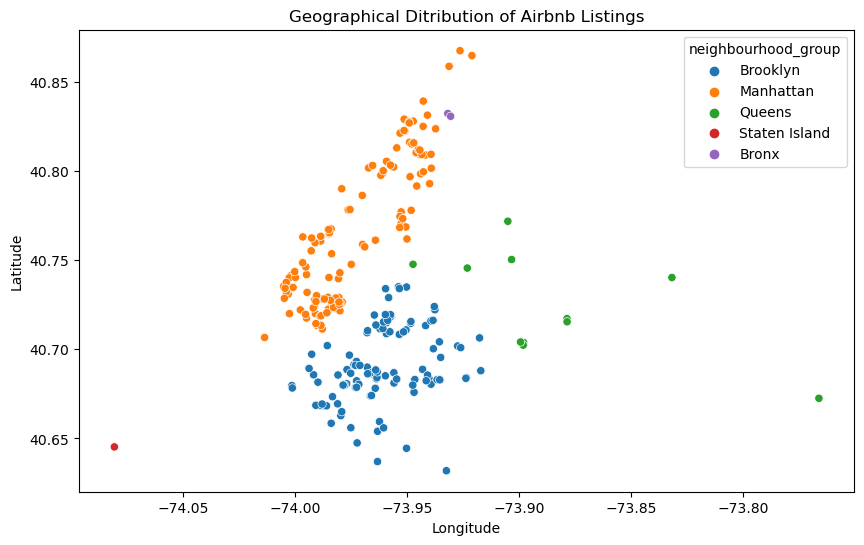

In [14]:
#3.

plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude',y='latitude',data=air,hue='neighbourhood_group')
plt.title('Geographical Ditribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 3. Scatter Plot (Airbnb): Latitude vs. Longitude
### Columns: latitude, longitude, neighbourhood_group
### DataFrame: airbnb
### Chart Type: Scatter Plot
Purpose: This scatter plot displays the geographical distribution of Airbnb listings using latitude and longitude coordinates. The points are color-coded by neighbourhood_group to highlight different areas. It helps in visualizing where the majority of listings are located and identifying densely populated regions.

C:\Users\soham\AppData\Local\Temp\ipykernel_15240\4242663060.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(air.corr(),annot=True,cmap='coolwarm')


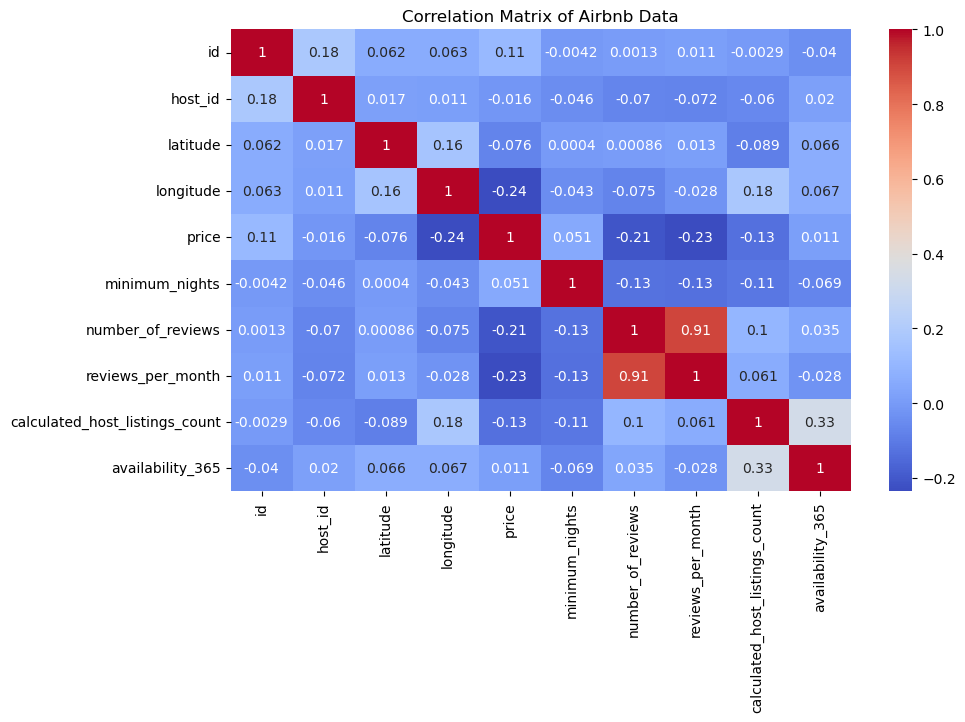

In [15]:
#4.

plt.figure(figsize=(10,6))
sns.heatmap(air.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix of Airbnb Data")
plt.show()

# 4. Heatmap (Airbnb): Correlation Matrix
### Columns: All numerical columns
### DataFrame: airbnb
### Chart Type: Heatmap
Purpose: The heatmap shows the correlation between numerical variables in the Airbnb dataset. It helps to identify relationships between different variables, such as the connection between price, minimum_nights, number_of_reviews, and more. This can be useful for feature selection and understanding dependencies.

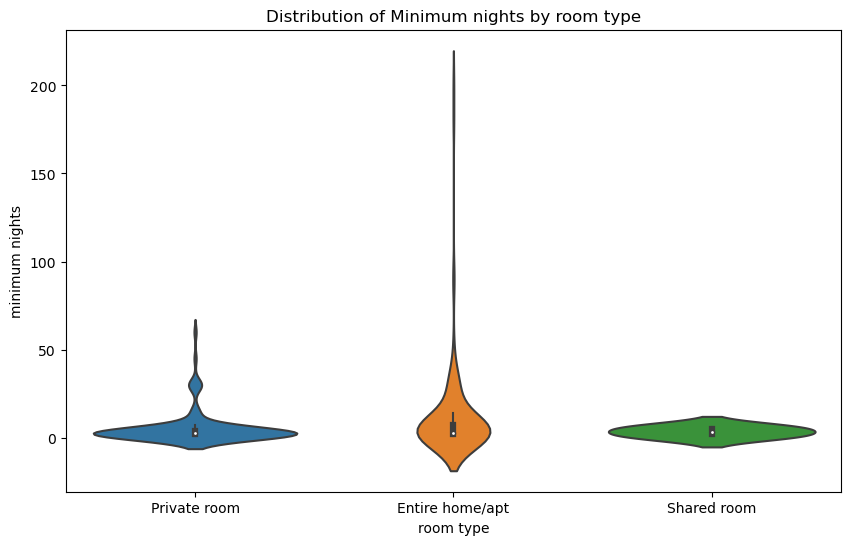

In [16]:
#5.

plt.figure(figsize=(10,6))
sns.violinplot(x='room_type',y='minimum_nights',data=air)
plt.title('Distribution of Minimum nights by room type')
plt.xlabel('room type')
plt.ylabel('minimum nights')
plt.show()

# 5.Violin Plot (Airbnb): Minimum Nights by Room Type
### Columns: room_type, minimum_nights
### DataFrame: airbnb
### Chart Type: Violin Plot
Purpose: The violin plot shows the distribution of minimum nights required for bookings across different room types. It provides a detailed view of the range and density of minimum stay requirements, helping to identify which room types typically have longer or shorter minimum stay policies.

## Cleaning and Analyzing HR dataset

In [47]:
#importing the HR 
# datset

hr=pd.read_csv("C:/Users/soham/OneDrive/Documents/Unmessenger/Assignments/Uncompleted/1207 Assessment 3/1207 Assessment 3/HR_Dataset.csv")
hr.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [48]:
hr.columns # checking column names

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [49]:
# checking null values

hr.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [50]:
# If an employee's DateofTermination is missing, it is likely because they are still employed.
# we can fill these with "Still Employed". 

hr['DateofTermination'].fillna("Still Employed",inplace=True)
hr['DateofTermination']

0      Still Employed
1           6/16/2016
2           9/24/2012
3      Still Employed
4            9/6/2016
            ...      
306    Still Employed
307         9/29/2015
308    Still Employed
309    Still Employed
310    Still Employed
Name: DateofTermination, Length: 311, dtype: object

In [51]:
# thw missing values in ManagerID column has Mangaer Name of 'Webster Butler'.
# his Manager ID i.e 39, is used in Manager ID in various rows
# so we can fill this with 39 as well.
hr[hr['ManagerName']=="Webster Butler"]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,1/11/2019,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,...,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2/1/2019,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,...,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,1/14/2019,0,4
65,"DeGweck, James",10070,1,1,1,5,5,3,0,55722,...,Webster Butler,39.0,Indeed,Fully Meets,5.00,4,0,4/2/2016,0,14
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,1/7/2019,0,7
89,"Ferguson, Susan",10189,1,1,0,5,5,3,0,57748,...,Webster Butler,39.0,Google Search,Fully Meets,3.13,3,0,2/4/2016,0,16
105,"Gilles, Alex",10283,1,1,1,5,5,2,1,54933,...,Webster Butler,39.0,Diversity Job Fair,Needs Improvement,3.97,4,0,1/20/2015,3,15
124,"Harrington, Christie",10097,0,0,0,5,5,3,0,52177,...,Webster Butler,39.0,CareerBuilder,Fully Meets,4.64,4,0,5/2/2015,0,8
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,...,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2/14/2019,0,6


In [54]:
hr['ManagerID'].fillna(39,inplace=True) # filling the missing val
hr[hr['ManagerName']=='Webster Butler']

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,...,Webster Butler,39.0,LinkedIn,Fully Meets,4.20,4,0,1/11/2019,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,...,Webster Butler,39.0,Google Search,Fully Meets,3.19,3,0,2/1/2019,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,...,Webster Butler,39.0,LinkedIn,Fully Meets,3.80,5,0,1/14/2019,0,4
65,"DeGweck, James",10070,1,1,1,5,5,3,0,55722,...,Webster Butler,39.0,Indeed,Fully Meets,5.00,4,0,4/2/2016,0,14
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,...,Webster Butler,39.0,LinkedIn,Fully Meets,4.00,4,0,1/7/2019,0,7
89,"Ferguson, Susan",10189,1,1,0,5,5,3,0,57748,...,Webster Butler,39.0,Google Search,Fully Meets,3.13,3,0,2/4/2016,0,16
105,"Gilles, Alex",10283,1,1,1,5,5,2,1,54933,...,Webster Butler,39.0,Diversity Job Fair,Needs Improvement,3.97,4,0,1/20/2015,3,15
124,"Harrington, Christie",10097,0,0,0,5,5,3,0,52177,...,Webster Butler,39.0,CareerBuilder,Fully Meets,4.64,4,0,5/2/2015,0,8
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,...,Webster Butler,39.0,Indeed,Fully Meets,4.50,3,0,2/14/2019,0,6


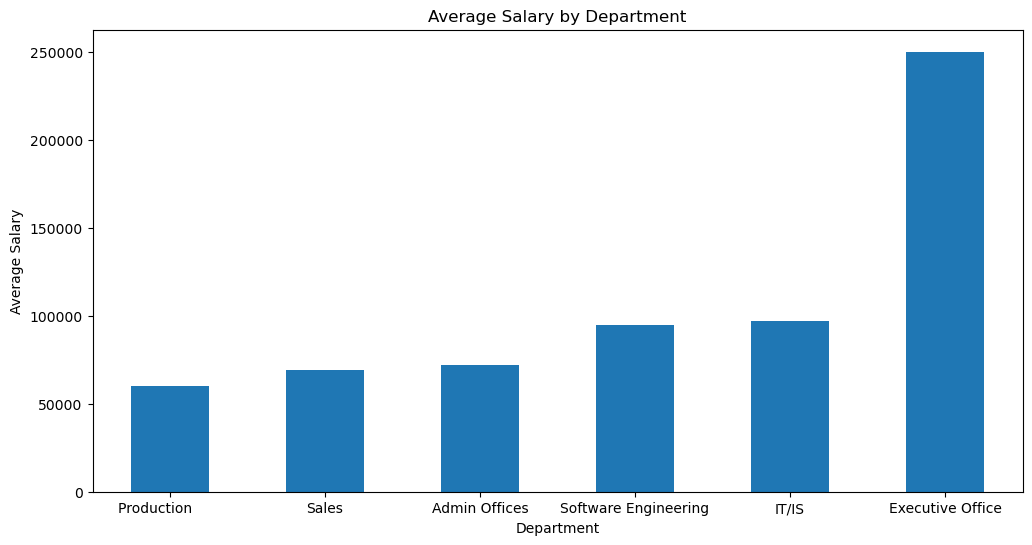

In [64]:
# !.

avg_salary_by_department = hr.groupby('Department')['Salary'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_salary_by_department.plot(kind='bar',)
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=360)
plt.show()

# 1. Bar Plot (HR): Average Salary by Department
### Columns: Department, Salary
### DataFrame: HR
### Chart Type: Bar Plot
Purpose: This bar plot shows the average salary for each department. It is useful for comparing the salary levels across departments, identifying departments with higher or lower average salaries, and providing insights into pay structures within the organization.

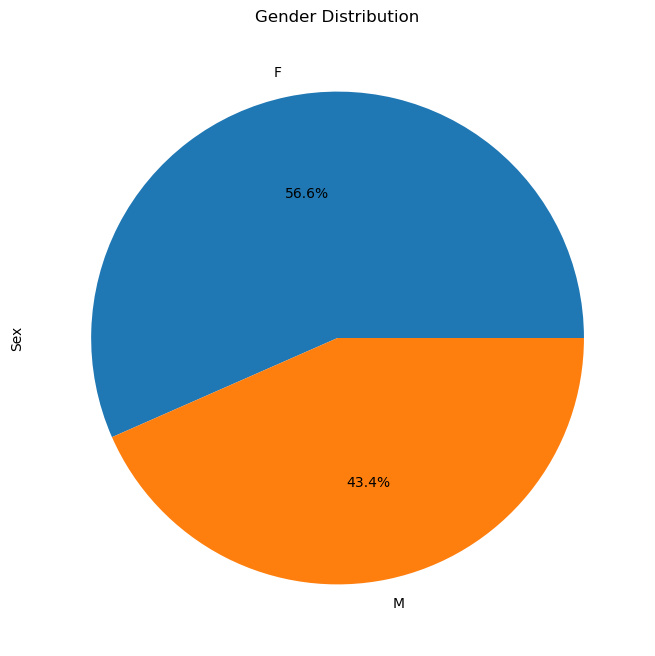

In [68]:
#2. 

gender_count=hr['Sex'].value_counts()

plt.figure(figsize=(10,8))
gender_count.plot(kind='pie',autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# 2. Pie Chart (Employee): Gender Distribution
### Columns: Sex
### DataFrame: HR
### Chart Type: Pie Chart
Purpose: This pie chart shows the proportion of male and female employees in the dataset. It provides a quick overview of gender diversity in the workforce, helping to assess gender balance in the company.

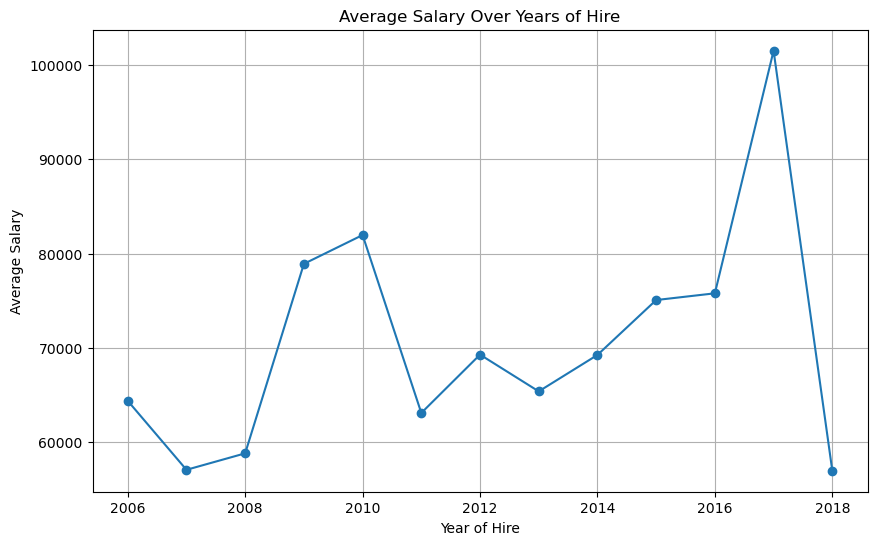

In [69]:
#3. 

# Ensure the 'DateofHire' is a datetime type
hr['DateofHire'] = pd.to_datetime(hr['DateofHire'])
# Extracting the year of hire for simplicity
hr['YearOfHire'] = hr['DateofHire'].dt.year
# Calculate the average salary per year of hire
avg_salary_by_year = hr.groupby('YearOfHire')['Salary'].mean()



# Create a line plot of average salary over time
plt.figure(figsize=(10, 6))
avg_salary_by_year.plot(kind='line', marker='o', linestyle='-')
# Add titles and labels
plt.title('Average Salary Over Years of Hire')
plt.xlabel('Year of Hire')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()


# 3. Line Plot : Average Salary Over Time
### Columns: YearOfHire, Salary
### DataFrame: HR
### Chart Type: Line Plot
Purpose: This line plot shows the trend of average salaries over the years of hire. It helps in identifying how the company’s salary offerings have changed over time and whether there has been a rise or fall in the salaries of newly hired employees.

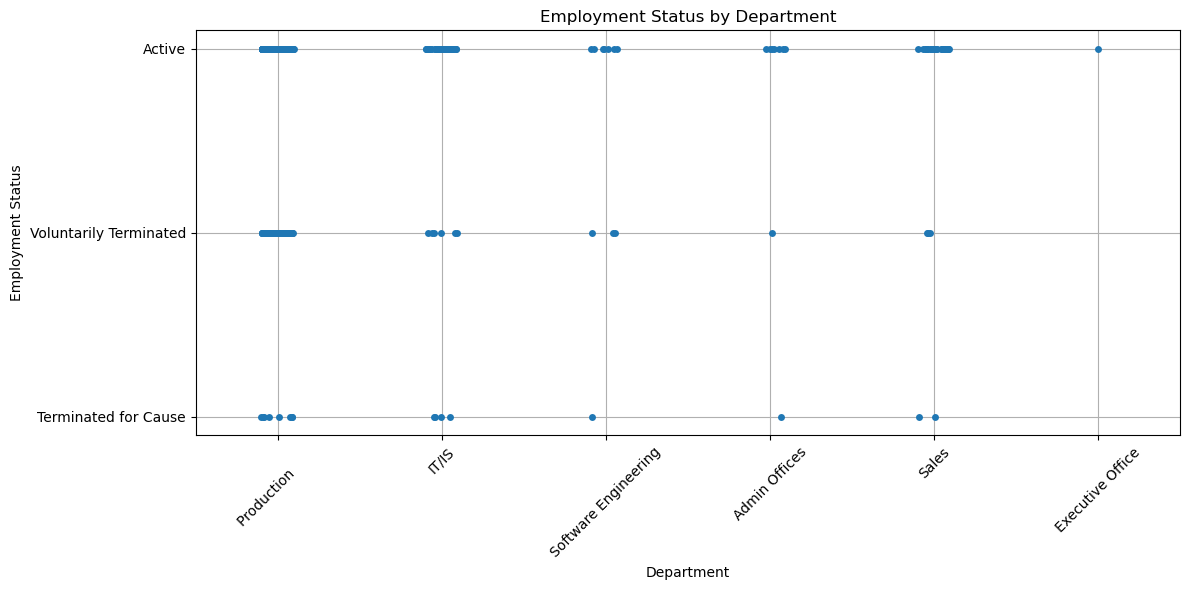

In [73]:
#4. 

# Create a strip plot for employment status by department
plt.figure(figsize=(12, 6))
sns.stripplot(x='Department', y='EmploymentStatus', data=hr, jitter=True, dodge=True)

# Add titles and labels
plt.title('Employment Status by Department')
plt.xlabel('Department')
plt.ylabel('Employment Status')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


# 4. Dot Plot for Employment Status by Department
### Columns: Department, EmploymentStatus
### DataFrame: HR
### Chart Type: Strip Plot (Dot Plot)
Purpose: This strip plot shows individual employees’ employment status distributed across different departments. The jitter parameter adds some noise along the x-axis, making it easier to see overlapping data points. This plot helps to see how many employees fall into each status for each department without aggregating the data into bars.

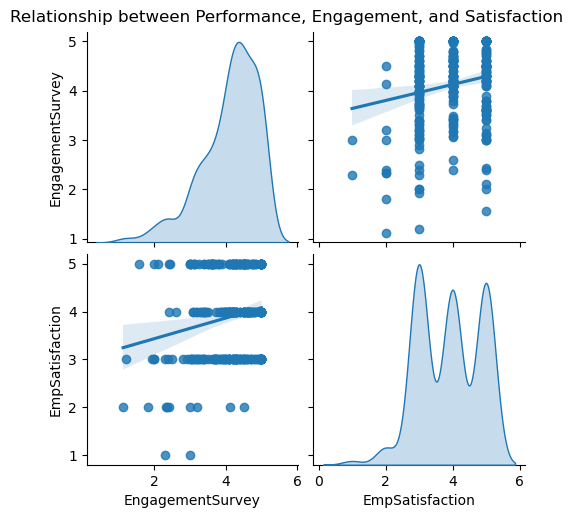

In [27]:
#5. 
sns.pairplot(hr[['PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction']], kind='reg', diag_kind='kde')
plt.suptitle('Relationship between Performance, Engagement, and Satisfaction', y=1.02)
plt.show()


# 5. Pair Plot : Performance and Satisfaction Metrics
### Columns: PerformanceScore, EngagementSurvey, EmpSatisfaction
### DataFrame: HR
### Chart Type: Pair Plot
Purpose: The pair plot explores relationships between performance scores, engagement survey results, and employee satisfaction. It helps in visualizing potential correlations and trends among these metrics, allowing for a better understanding of how engagement and satisfaction impact performance.